In [35]:
import glob

import numpy as np
import matplotlib.pyplot as plt
from preprocess import *

from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.manifold import TSNE
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.models import word2vec


In [2]:
%cd /

/


In [3]:
pwd


'/'

In [4]:
#Experiment with pretrained Word Embeddings 100 dim
glove_input_file = 'beegfs/sb6416/glove.6B.100d.txt'
word2vec_output_file = 'beegfs/sb6416/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [5]:
mother = model.get_vector('mother')
father = model.get_vector('father')

In [6]:
king = model.get_vector('king')
queen = model.get_vector('queen')

In [13]:
from scipy import spatial

print(1 - spatial.distance.cosine(father, mother))
print(1 - spatial.distance.cosine(king,queen))
print(1 - spatial.distance.cosine((father - mother),(king - queen)))

0.6039110422134399


In [15]:

model.similar_by_word('computer')

[('computers', 0.8751983046531677),
 ('software', 0.8373122215270996),
 ('technology', 0.7642159461975098),
 ('pc', 0.7366448044776917),
 ('hardware', 0.7290390729904175),
 ('internet', 0.72867751121521),
 ('desktop', 0.7234442234039307),
 ('electronic', 0.7221829295158386),
 ('systems', 0.7197922468185425),
 ('computing', 0.7141730785369873)]

In [ ]:
bin_files = glob.glob("/beegfs/jtc440/ds1012/preprocessed_data/bbc/data/_b*.bin")
output_file = '/beegfs/sb6416/ds1012/bbcterms.txt'
generate_input_for_glove(bin_files,'/beegfs/jtc440/ds1012/preprocessed_data/bbc/VOCAB.txt', output_file)

In [13]:
pwd

'/'

In [14]:


glove_file = datapath('/beegfs/sb6416/ds1012/glove/vectors.txt')

tmp_file = get_tmpfile('/beegfs/sb6416/ds1012/glove/test_word2vec.txt')
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file, binary = False)


In [35]:
from sklearn.manifold import TSNE
#model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
print(model.similar_by_word('computer'),'\n')
print(model.similar_by_word('man'),'\n')
print(model.similar_by_word('men'),'\n')
print(model.similar_by_word('women'),'\n')
print(model.similar_by_word('woman'),'\n')

[('lenovo', 0.8548531532287598), ('milk', 0.8257240653038025), ('reddy', 0.7980887293815613), ('aston', 0.7946731448173523), ('pharma', 0.7795918583869934), ('kuchma', 0.7783769369125366), ('electric', 0.7699139714241028), ('ufj', 0.7617802023887634), ('danish', 0.7603610754013062), ('exel', 0.7592095732688904)] 

[('richest', 0.8168516755104065), ('utd', 0.8005639314651489), ('poorest', 0.6786810159683228), ('mobile', 0.6711897253990173), ('manufacturer', 0.6670331954956055), ('cement', 0.6636903882026672), ('supporters', 0.650122344493866), ('rating', 0.647864580154419), ('mcdonald', 0.6477839350700378), ('ufj', 0.6470972895622253)] 

[('biogen', 0.7791646122932434), ('lesotho', 0.7596577405929565), ('shed', 0.7563890218734741), ('carlsberg', 0.7479979395866394), ('mg', 0.7439753413200378), ('famous', 0.7391798496246338), ('interviews', 0.737449586391449), ('farms', 0.7302870154380798), ('skilled', 0.7282817959785461), ('wages', 0.7136820554733276)] 

[('parents', 0.8046016097068787)

KeyError: "word 'woman' not in vocabulary"

In [28]:
import numpy as np
import matplotlib.pyplot as plt
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

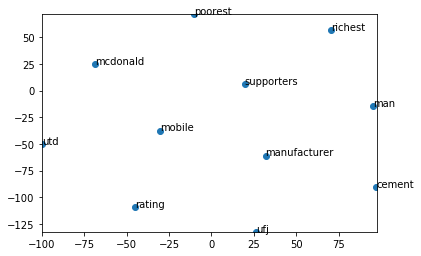

KeyError: "word 'woman' not in vocabulary"

In [24]:
display_closestwords_tsnescatterplot(model, 'man')
display_closestwords_tsnescatterplot(model, 'woman')


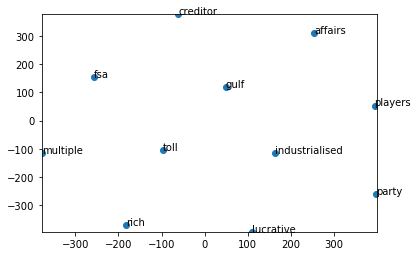

In [28]:
display_closestwords_tsnescatterplot(model, 'rich')


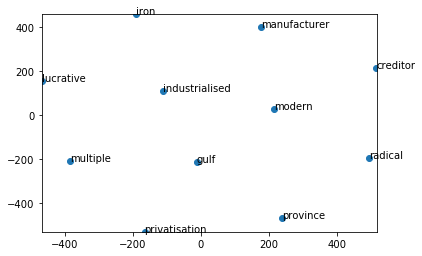

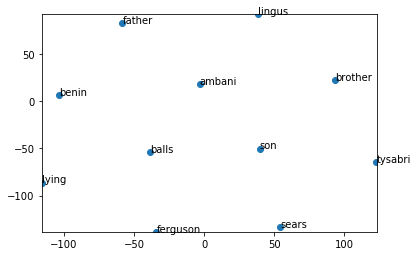

KeyError: "word 'mother' not in vocabulary"

In [39]:
display_closestwords_tsnescatterplot(model, 'creditor')
display_closestwords_tsnescatterplot(model, 'father')
display_closestwords_tsnescatterplot(model, 'mother')

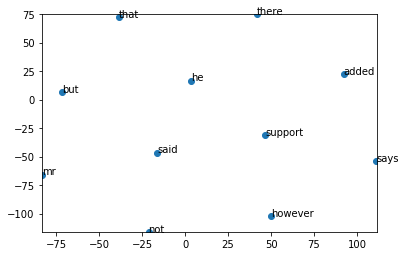

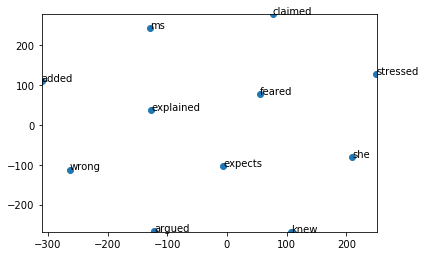

In [40]:

display_closestwords_tsnescatterplot(model, 'he')
display_closestwords_tsnescatterplot(model, 'she')

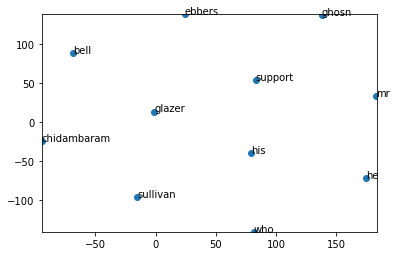

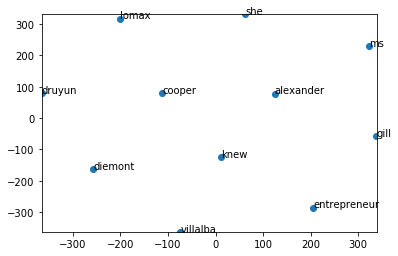

In [41]:

display_closestwords_tsnescatterplot(model, 'mr')
display_closestwords_tsnescatterplot(model, 'ms')

In [19]:
#vectors trained on the bbc corpus

glove_file = datapath('/beegfs/sb6416/ds1012/glove/vectors_bbc_100.txt')

tmp_file = get_tmpfile('/beegfs/sb6416/ds1012/glove/test_word2vec.txt')
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file, binary = False)


In [17]:
pwd

'/'

In [21]:
model.similar_by_word('man')

[('spider', 0.8195323944091797),
 ('utd', 0.7317980527877808),
 ('richest', 0.5904212594032288),
 ('who', 0.5453464984893799),
 ('shoes', 0.5400803089141846),
 ('young', 0.5383310317993164),
 ('behind', 0.5344072580337524),
 ('midfield', 0.4897892475128174),
 ('woman', 0.4836812913417816),
 ('city', 0.47314971685409546)]

In [22]:
model.similar_by_word('woman')

[('wonder', 0.6167048215866089),
 ('mother', 0.5749515891075134),
 ('girl', 0.5681089162826538),
 ('indian', 0.5099036693572998),
 ('man', 0.4836812913417816),
 ('letter', 0.4644049406051636),
 ('young', 0.4510127604007721),
 ('first', 0.44287654757499695),
 ('27-year', 0.4268023371696472),
 ('person', 0.42232590913772583)]

In [31]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [37]:
tsne_plot(model)

/home/sb6416/pyenv/py3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


KeyboardInterrupt: 

In [97]:
he = model.get_vector('he')
she = model.get_vector('she')
diff = he - she

print(1 - spatial.distance.cosine(he, diff))
print(1 - spatial.distance.cosine(she, diff))

0.6531819105148315
-0.32884541153907776


A company has more similarity with 'he' than 'she'

In [84]:
word_list = ['player', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'election',  'computer', 'president', 'security', 'executive', 'dollar', 'rich',
    'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'company', 'singer', 'sport', 'blogger', 'lawyer', 'director','director', 'business','spokesman'
            ]
for w in word_list:
    print (w, (1 - spatial.distance.cosine(model.get_vector(w),diff)))

player 0.2802762985229492
guns 0.060967277735471725
science -0.10564393550157547
arts -0.1016790047287941
literature -0.23165403306484222
warrior -0.028605710715055466
doctor -0.1290295273065567
election 0.37715569138526917
computer 0.06720244884490967
president 0.13364899158477783
security 0.2618531286716461
executive 0.0769774317741394
dollar 0.10810337960720062
rich 0.12323682755231857
technology -0.054672326892614365
fashion 0.03943635895848274
teacher 0.016608966514468193
engineer -0.08588037639856339
pilot -0.16886942088603973
company 0.03425980359315872
singer -0.06405365467071533
sport -0.009377296082675457
blogger -0.29034194350242615
lawyer -0.04424518719315529
director 0.0847906768321991
director 0.0847906768321991
business 0.16507859528064728
spokesman 0.1563638150691986


Interstingly, science, doctor, engineer, technology, lawyer are closer to 'she' and player, business, company are much closer to 'he'.

Diabising 'player' (py is the player perpendicular to diff)

In [85]:
player = model.get_vector('player')
px =(diff*(player.dot(diff))/diff.dot(diff))
py=(player-px)
print(1 - spatial.distance.cosine(py,diff))

-2.757521144758357e-08


In [96]:
#Repeat same for man and woman
man = model.get_vector('man')
woman = model.get_vector('woman')
diff2 = man-woman

print(1 - spatial.distance.cosine(man, diff2))
print(1 - spatial.distance.cosine(woman, diff2))

word_list = ['player', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'election',  'computer', 'president', 'security', 'executive', 'dollar', 'rich',
    'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'company', 'singer', 'sport', 'blogger', 'lawyer','director', 'business','spokesman'
            ]
for w in word_list:
    print (w, (1 - spatial.distance.cosine(model.get_vector(w),diff2)))

0.7074326276779175
-0.2764338552951813
player 0.16169850528240204
guns 0.08113472163677216
science -0.10218925774097443
arts -0.1288418173789978
literature -0.007499655708670616
warrior -0.10780968517065048
doctor -0.08264510333538055
election 0.12435315549373627
computer 0.15772101283073425
president 0.08835015445947647
security 0.00013452378334477544
executive 0.016882415860891342
dollar 0.0037057134322822094
rich 0.22877581417560577
technology 0.18263091146945953
fashion -0.08622092008590698
teacher 0.03088066354393959
engineer -0.109612837433815
pilot -0.06856723874807358
company 0.06912615895271301
singer 0.06553662568330765
sport 0.12149433046579361
blogger -0.14322292804718018
lawyer -0.007281404919922352
director 0.15909737348556519
business 0.1934342086315155
spokesman -0.14025571942329407


Equalize man and woman with technology

In [102]:
v = (man+woman)/2
vx= (diff*(v.dot(diff))/diff.dot(diff))
vy = v -vx
mx = (diff*(man.dot(diff))/diff.dot(diff))
wx = (diff*(woman.dot(diff))/diff.dot(diff))
mc = (np.sqrt(abs(1-vy.dot(vy)))*(mx-vx))/np.sqrt((man-vy-vx).dot((man-vy-vx)))
wc = np.sqrt(abs(1-vy.dot(vy)))*(wx-vx)/np.sqrt((woman-vy-vx).dot((woman-vy-vx)))

eq_man = mc+vy
eq_woman=wc+vy
print(eq_man)
print(eq_woman)


[ 0.04759885 -0.4914708   0.03324327  0.30399433 -0.50781935  0.60357904
  0.0395848  -0.2233926   0.43507698 -0.30434617 -0.05248071  0.19317922
  0.43098813  0.5393019   0.01013302  0.43194345  0.815101    1.0161202
 -0.11911576 -0.7880044   0.6981918   0.12926158 -0.19780806  0.10005973
  0.3479735   0.17815831 -0.46188545 -0.15681434  0.71986157 -0.01447423
  0.5959754   0.20025718 -0.02160006  0.0972124  -0.30117354  0.25233012
 -0.26538944 -0.02116796  0.38543195  0.26480877 -0.40150145  0.3543266
 -0.30617    -0.38270804 -0.0597921  -0.09233817  0.04998031  0.6195437
  0.3731047  -0.25010657 -0.09558605  0.13766962  0.3578261  -0.20676643
 -0.4074352   0.29278034  0.5002129   0.15019025 -0.3300342   0.47187874
  0.5323633  -0.14660703 -0.42940062 -0.04143411  0.04461666 -0.1101445
  0.2923178  -0.3141873  -0.13200954  0.16811576 -0.04015909 -0.38584825
 -0.06091703 -0.86286795 -0.08063425 -0.04969995  0.23535933  0.12164129
 -0.11875641 -0.1695908  -0.3267477   0.21432173  0.029

In [103]:
print(1 - spatial.distance.cosine(man, diff))
print(1 - spatial.distance.cosine(woman, diff))

0.0992392897605896
-0.26510152220726013


In [107]:
print(1 - spatial.distance.cosine(eq_man, diff))
print(1 - spatial.distance.cosine(eq_woman, diff))

0.29555797576904297
-0.29555800557136536
